In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

import warnings
warnings.simplefilter('ignore')

Load data

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X = iris.drop('species', axis=1)
y = iris['species']

Visualization

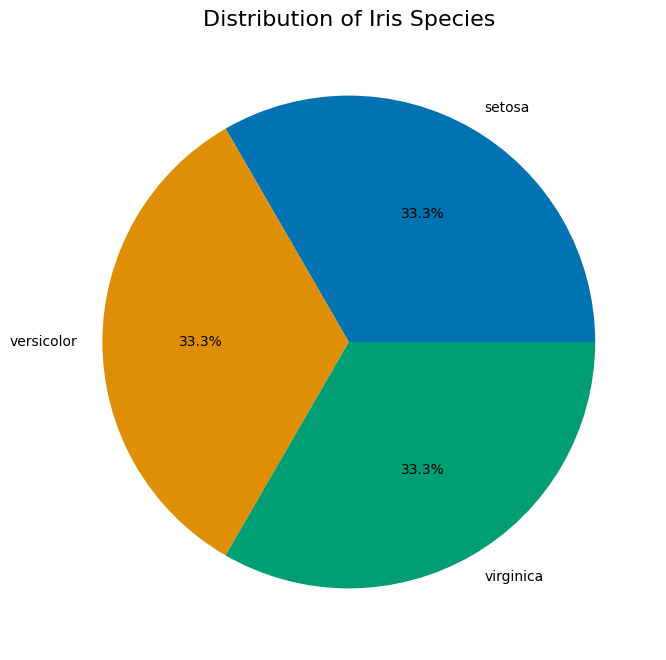

In [6]:
species_distribution = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species_distribution, labels=species_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('colorblind'))
plt.title('Distribution of Iris Species', fontsize=16)
plt.show()

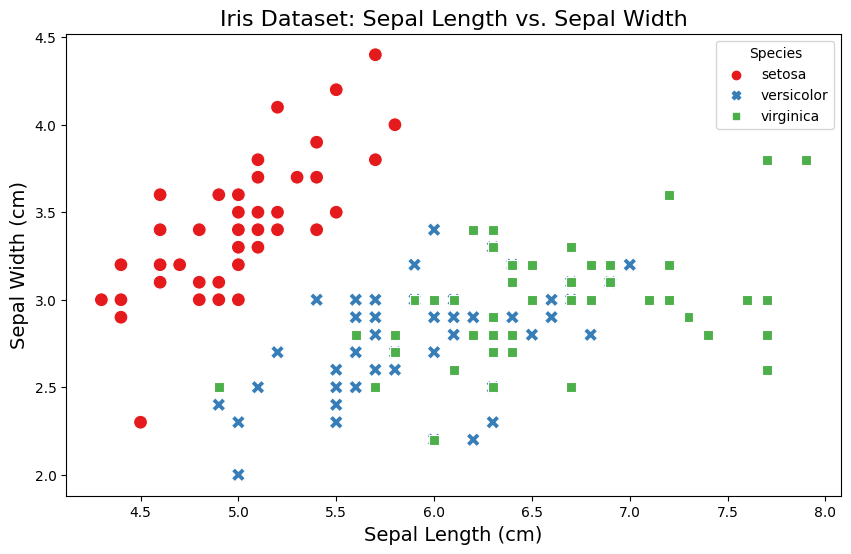

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species', palette='Set1', s=100)

plt.xlabel("Sepal Length (cm)", fontsize=14)
plt.ylabel("Sepal Width (cm)", fontsize=14)
plt.title("Iris Dataset: Sepal Length vs. Sepal Width", fontsize=16)

plt.legend(title="Species")

plt.show()

Split data

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

Create a Gaussian classifier and train model

In [9]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Naively evaluate the model's accuracy.

In [10]:
(y_pred == y_test).sum()/len(y_test)

0.9777777777777777

Test with metrics

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [12]:
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending=False)

In [13]:
feature_imp

petal_length    0.474101
petal_width     0.424876
sepal_length    0.076567
sepal_width     0.024456
dtype: float64

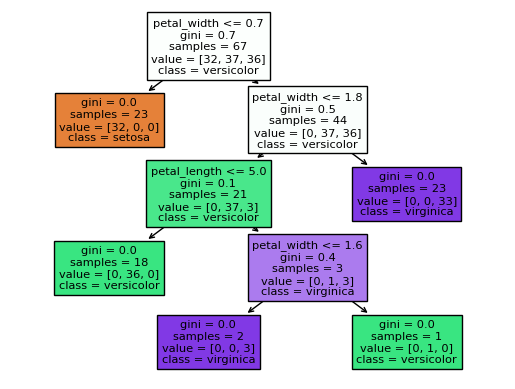

In [14]:
tree.plot_tree(clf.estimators_[0], 
               feature_names=X.columns, 
               class_names=iris['species'].unique(), 
               filled=True, 
               precision=1)
plt.show()

Compare to k=means 

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

Feature standardization

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow method to determine optimal number of clusters

In [17]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_scaled)
    inertia.append(kmeans_test.inertia_)

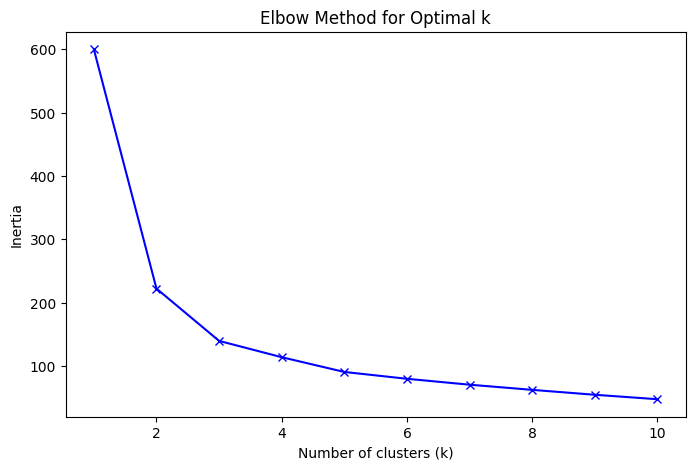

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [19]:
optimal_k = 3

Final K-means model with optimal k

In [20]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters_final = kmeans_final.fit_predict(X_scaled)
iris['cluster'] = clusters_final

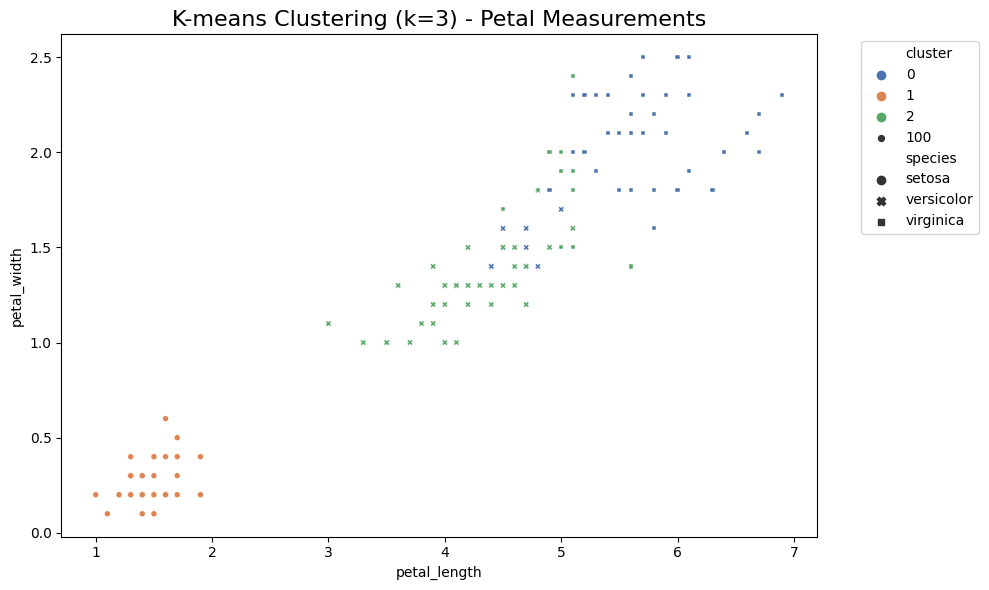

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, 
                x='petal_length', 
                y='petal_width', 
                hue='cluster', 
                style='species', 
                palette='deep',
                size=100)
plt.title(f'K-means Clustering (k={optimal_k}) - Petal Measurements', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Compare clusters with true species labels

In [22]:
cross_tab = pd.crosstab(iris['species'], iris['cluster'])
print("\nComparison of clusters with true species:")
print(cross_tab)


Comparison of clusters with true species:
cluster      0   1   2
species               
setosa       0  50   0
versicolor  11   0  39
virginica   36   0  14


In [23]:
ari_score = adjusted_rand_score(iris['species'], iris['cluster'])
nmi_score = normalized_mutual_info_score(iris['species'], iris['cluster'])
print(f"\nAdjusted Rand Index (ARI): {ari_score:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.3f}")
print(f"Inertia of final model: {kmeans_final.inertia_:.3f}")


Adjusted Rand Index (ARI): 0.620
Normalized Mutual Information (NMI): 0.659
Inertia of final model: 139.820
